In [18]:
import torch
import numpy as np
import matplotlib.pyplot as plt
from torch import Tensor
from torch.distributions import Distribution

In [19]:
def beta_basis(order: int) -> Distribution:
    """
    Returns a Beta distribution with the specified order.
    """
    alpha = torch.arange(1, order + 2, dtype=torch.float32)
    beta = torch.arange(order + 1, 0, -1, dtype=torch.float32)
    return torch.distributions.Beta(alpha, beta)

In [20]:
order = 10
basis = beta_basis(order)

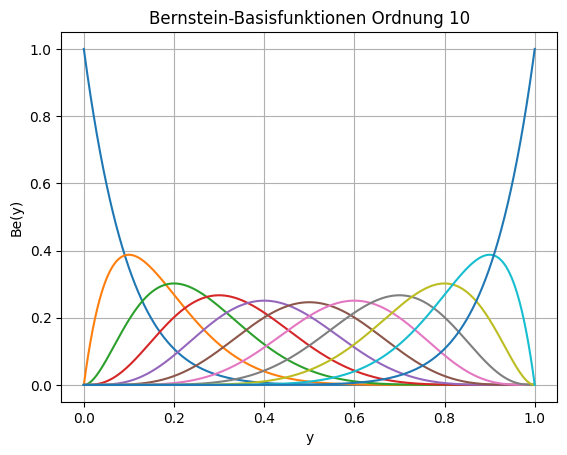

In [33]:
x = torch.linspace(0, 1, 1000).reshape(-1, 1)
y = basis.log_prob(x).exp()
y = y / y.max()
y = y.numpy()

plt.plot(x.numpy(), y)
plt.title('Bernstein-Basisfunktionen Ordnung {}'.format(order))
plt.xlabel('y')
plt.ylabel('Be(y)')
plt.grid()
plt.show()

In [22]:
def bernstein_poly(x: Tensor, theta: Tensor, basis: Distribution):
    """Compute the Bernstein polynomial of degree n at x."""
    b = basis.log_prob(x.unsqueeze(-1)).exp()
    y = torch.mean(b * theta, dim=-1)
    return y

In [30]:
def visualize_bernstein_poly(theta: Tensor, basis: Distribution, title: str = 'Bernstein-Polynom'):
    """Visualize the Bernstein polynomial."""
    x = torch.linspace(0, 1, 1000).reshape(-1, 1)
    y = bernstein_poly(x, theta, basis).numpy()
    y = y / y.max()
    
    plt.plot(x.numpy(), y)
    plt.title(title)
    plt.xlabel('y')
    plt.ylabel('h(y|x)')
    plt.grid()
    plt.show()

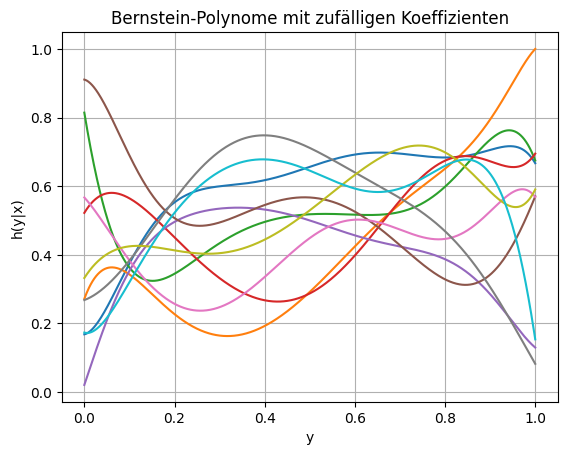

In [31]:
theta = torch.rand(10, order + 1)
visualize_bernstein_poly(theta, basis, title='Bernstein-Polynome mit zufälligen Koeffizienten')

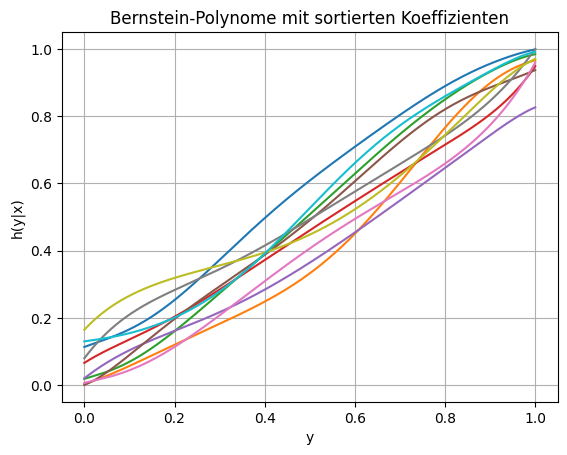

In [32]:
theta_sorted = torch.sort(theta, dim=-1).values
visualize_bernstein_poly(theta_sorted, basis, 'Bernstein-Polynome mit sortierten Koeffizienten')

In [46]:
def to_theta(theta: Tensor) -> Tensor:
    """Convert theta to [theta_0, theta_0 + exp(theta_1), ..., theta_n-1 + exp(theta_n)]"""
    theta_0 = theta[:, :1]
    theta_exp = torch.nn.functional.softplus(theta[:, 1:])
    theta = torch.cat([theta_0, theta_exp], dim=-1)
    theta = torch.cumsum(theta, dim=-1)
    return theta

In [47]:
theta = torch.randn(1, 10)
print(theta)
theta = to_theta(theta)
print(theta)

tensor([[ 1.1667,  1.3333, -1.3715, -0.4878,  0.9490, -0.1130, -1.4730, -1.2648,
         -0.3219, -0.5809]])
tensor([[1.1667, 2.7340, 2.9601, 3.4388, 4.7151, 5.3533, 5.5597, 5.8083, 6.3534,
         6.7977]])


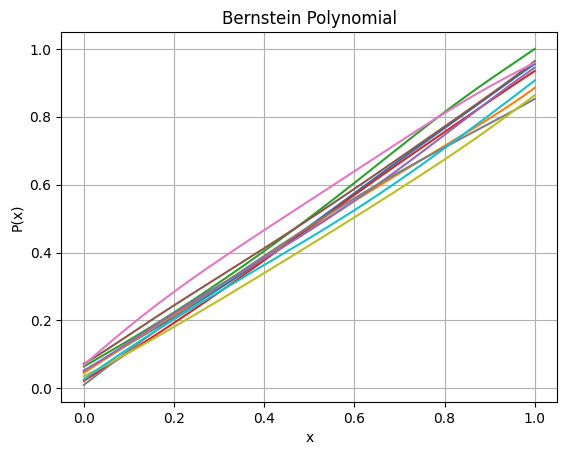

In [48]:
theta = torch.rand(10, order + 1)
theta = to_theta(theta)
visualize_bernstein_poly(theta, basis, 'Bernstein Polynomial with Transformed Coefficients')